In [26]:
# Importando as bibliotecas

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import read_csv
import pandas as pf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#%matplotlib inline
import warnings

In [27]:
# Importando a base de dados

data = pd.read_csv('../input/spotify-dataset/data/data.csv')

data.head(1000)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.9820,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.7320,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.9610,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.9670,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.9570,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.4660,1926,0.5090,"['Georgette Heyer', 'Irina Salkow']",0.756,118532,0.184,0,0BjtCwfDH15trQGxhUwwxT,0.000000,5,0.197,-22.445,1,Kapitel 358 - Der Page und die Herzogin,1,1926,0.9430,103.189
996,0.5530,1926,0.9960,['Francisco Canaro'],0.454,187693,0.541,0,0CdWVv6HzPxVy0UNLmC3Wz,0.958000,3,0.702,-14.280,0,La Piba Del Tabaris - Remasterizado,0,1926-07-12,0.8590,67.332
997,0.3850,1926,0.0977,['Эрнест Хемингуэй'],0.681,103000,0.304,1,0E34NDoA5tFsksVokrmFo1,0.000000,9,0.140,-15.338,1,Часть 81.3 - Фиеста,0,1926,0.9540,83.944
998,0.4120,1926,0.6230,"['Georgette Heyer', 'Irina Salkow']",0.623,129790,0.144,0,0ESV6VtxZY3DVei945FjXa,0.000000,0,0.240,-21.117,1,Kapitel 341 - Der Page und die Herzogin,1,1926,0.9370,76.790


In [28]:
# Visualizando as últimas linhas do conjunto de dados
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [29]:
# Visualizando a estrutura de dados

data.shape


(170653, 19)

In [30]:
# Visualizando as informações dos dados

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [31]:
data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [32]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [33]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [34]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


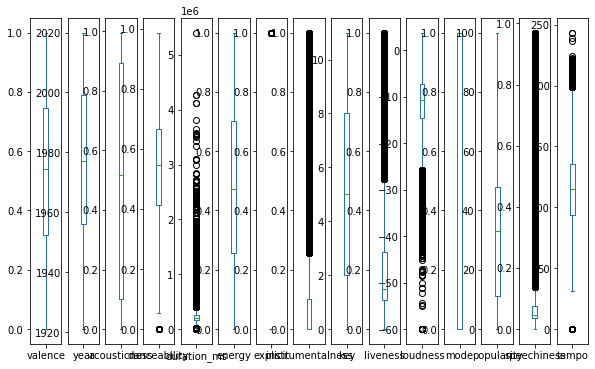

In [35]:
data.plot(kind="box",figsize=(10,6),subplots=True);

In [36]:
# Músicas com  a popularidade maior que 70

data[data["popularity"]>70]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
4006,0.247,1942,0.6730,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,177480,0.158,0,4so0Wek9Ig1p6CRCHuINwW,0.353000,9,0.3380,-16.485,1,White Christmas,76,1942-01-01,0.0381,130.503
4607,0.576,1945,0.7700,['Bing Crosby'],0.473,166000,0.212,0,44mYhOVgerj2qPjkGDVA6n,0.000000,0,0.1360,-15.018,0,It's Beginning To Look Like Christmas,71,1945-01-01,0.0496,96.940
7006,0.580,1957,0.9000,['Elvis Presley'],0.465,129173,0.270,0,3QiAAp20rPC3dcAtKtMaqQ,0.001040,4,0.1450,-16.661,1,Blue Christmas,74,1957-10-15,0.0425,94.518
7007,0.394,1957,0.9130,"['Ella Fitzgerald', 'Louis Armstrong']",0.443,185160,0.104,0,78MI7mu1LV1k4IA2HzKmHe,0.000000,0,0.1910,-17.042,1,Dream A Little Dream Of Me - Single Version,72,1957-01-01,0.1010,76.497
7207,0.915,1958,0.4100,['Elvis Presley'],0.647,146480,0.582,0,4gphxUgq0JSFv2BCLhNDiE,0.000002,10,0.0715,-9.538,0,Jailhouse Rock,73,1958-03-21,0.0755,167.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170632,0.738,2020,0.1600,"['Rauw Alejandro', 'Dalex', 'Lenny Tavárez', '...",0.788,325692,0.629,1,3oCghu20Kto5Xcu8Pg0cit,0.000828,0,0.0598,-4.727,1,"Elegí (feat. Farruko, Anuel AA, Sech, Dímelo F...",75,2020-08-28,0.0883,172.044
170636,0.394,2020,0.2010,"['Myke Towers', 'Maluma', 'Farruko']",0.775,250333,0.633,1,70zg99pT51vB4wlMS7e4q7,0.000000,10,0.2190,-3.332,0,La Playa - Remix,74,2020-01-03,0.1330,140.008
170648,0.608,2020,0.0846,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170650,0.637,2020,0.1010,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688


In [37]:
#5 músicas mais longas
data[["name","tempo"]].sort_values("tempo",ascending=False)[0:5]

,name,tempo
82884,I Don't Want You on My Mind,243.507
29113,Call The Doctor,243.372
64511,Dear Landlord,238.895
28559,Candyman - 2013 Remaster,236.799
164226,Surrender - 2005 Remastered Version,224.437


In [38]:
#Frequencia de aparecimento das músicas na base de dados
data.name.value_counts()

White Christmas                    73
Winter Wonderland                  63
Summertime                         56
Jingle Bells                       53
Overture                           46
                                   ..
I'd Rather Die Young                1
Oh Baby Doll                        1
Music To Be Murdered By             1
The Blues Are Brewin'               1
Billetes Azules (with J Balvin)     1
Name: name, Length: 133638, dtype: int64

In [39]:
# Análise de maior popularidade pelo conjunto de dados

data.sort_values("popularity",ascending=False).head(100)



,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19611,0.145,2020,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928
19606,0.756,2020,0.2210,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989
19618,0.737,2020,0.0112,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044
19608,0.357,2020,0.0194,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
19610,0.682,2020,0.4680,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19006,0.437,2017,0.4690,['XXXTENTACION'],0.872,119133,0.391,1,7m9OqQk4RVRkw9JJdeAw96,0.000004,0,0.2970,-9.144,0,Jocelyn Flores,87,2017-08-25,0.2420,134.021
19634,0.322,2020,0.0469,"['Kane Brown', 'Swae Lee', 'Khalid']",0.727,191406,0.626,0,5f1joOtoMeyppIcJGZQvqJ,0.000026,7,0.1260,-8.415,1,Be Like That - feat. Swae Lee & Khalid,87,2020-07-10,0.0726,86.970
19650,0.286,2020,0.0221,"['Pop Smoke', '50 Cent', 'Roddy Ricch']",0.490,201600,0.618,1,1H7KnK26kc1YyellpbINEn,0.000004,1,0.2590,-5.655,1,The Woo (feat. 50 Cent & Roddy Ricch),87,2020-07-03,0.1040,99.700
19442,0.327,2019,0.5920,['Ariana Grande'],0.778,178627,0.317,1,6ocbgoVGwYJhOv1GgI9NsF,0.000000,1,0.0881,-10.732,0,7 rings,87,2019-02-08,0.3340,140.048


In [40]:
# Média de populariade dos artistas

data[["artists","popularity"]].groupby("artists").mean()

,popularity
artists,
"[""'In The Heights' Original Broadway Company"", 'Mandy Gonzalez']",54.000
"[""'In The Heights' Original Broadway Company""]",46.000
"[""'Legally Blonde' Ensemble"", 'Michael Rupert', 'Nikki Snelson']",46.000
"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",43.000
"[""'Til Tuesday""]",34.625
...,...
['黃品源'],48.000
"['黃國隆', '王秋玉']",23.000
['黃國隆'],23.000


In [41]:
# Encontrando a correlação dos dados

data.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


In [42]:
data["Popularity Status"] = data["popularity"].apply(lambda x: 1 if x>70 else 0)
display(data)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Popularity Status
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,1
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,0
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,1
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,0


In [43]:
warnings.filterwarnings("ignore")

In [44]:
#Criando novo DataFrame com colunas úteis para a aplicação do modelo

ndata = data[["acousticness","danceability","duration_ms","energy","explicit","instrumentalness","liveness","loudness","mode","popularity","speechiness","tempo","Popularity Status"]]


array = ndata.values
#Criando array de inputs e outputs

x= array[:,0:12]
y= array[:,12]

#Criando Conjuntos de Treinos e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=7)


In [45]:
#Criando Modelo
modelo = LogisticRegression()

# Treinamento do Modelo
modelo.fit(x_treino, y_treino)

#Score do modelo nos dados de teste
result = modelo.score(x_teste,y_teste)

print(f" A acurácia (precisão) dos dados de Teste {result.mean()*100:.2f}")

 A acurácia (precisão) dos dados de Teste 97.54


In [46]:
#Criando modelo de matriz de confusão
from sklearn.metrics import confusion_matrix
y_pred = modelo.predict(x_teste)

mat = confusion_matrix(y_teste,y_pred)

print(mat)


[[49562   362]
 [  896   376]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     49924
         1.0       0.51      0.30      0.37      1272

    accuracy                           0.98     51196
   macro avg       0.75      0.64      0.68     51196
weighted avg       0.97      0.98      0.97     51196



In [48]:
#Criando novo DataFrame com colunas úteis para a aplicação do modelo

ndata = data[["acousticness","danceability","duration_ms","energy","explicit","instrumentalness","liveness","loudness","mode","popularity","speechiness","tempo","Popularity Status"]]


array = ndata.values
#Criando array de inputs e outputs

x= array[:,0:12]
y= array[:,12]



In [49]:
# Definindo o número de folds

num_folds = 30
seed = 100

# Separando os dados em folds
Kfold = KFold(n_splits=num_folds,shuffle=True,random_state = seed)

#Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo,x,y, cv = Kfold )

print(f" a acurácia nos dados de Teste {result*100:.2f}")

 a acurácia nos dados de Teste 97.54


Heat Map:-
It is a graphical representation of data where values are depicted by color. 